In [1]:
import pandas as pd
import nltk
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("C:\Users\sivad\Desktop\Jupyter Notebook files.csv")

# Convert categorical values to numerical values
data['target'] = data['target'].replace({'Negative': 1, 'Positive':0, 'positive':0})
data.head()

,date,stars,target,text
0,23-Nov-15,5,0,I have been using this earphone from last 2 mo...
1,13-Apr-16,5,0,BASS king bt Vocals are average...bt w8 let me...
2,19-May-16,5,0,Material quality great. Sound is good but don'...
3,22-Sep-16,5,0,I used many brands but this one is so so trust...
4,29-Sep-16,5,0,Reviewing this product after complete burn in ...


# A Sentiment Analysis to understand the overall sentiment of your product.

In [4]:
import os

In [6]:
# Create a directory to store the text files
os.makedirs('text_files', exist_ok=True)

# Iterate over the rows of the dataset and write the text column to a separate text file for each row
for i, row in data.iterrows():
    # Generate the filename using the row index
    filename = f"text_files/text_{i}.txt"
    
    # Extract the text from the 'text' column
    text = row['text']
    
    # Write the text to the file
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(text)

In [7]:
import glob

# Get a list of all the text files in the directory
file_list = glob.glob('text_files/*.txt')

# Sort the file list by filename (assuming the filenames follow a similar format)
file_list = sorted(file_list)

# Create a new file to write the collated text
with open('collated_text.txt', 'w', encoding='utf-8') as f:
    # Loop through each text file and write its contents to the collated file, with a blank line between each file
    for i, file_path in enumerate(file_list):
        with open(file_path, 'r', encoding='utf-8') as file:
            f.write(file.read())
            if i < len(file_list) - 1:
                f.write('\n\n')  # add blank lines between files


In [8]:
# Let us work with Trip advisor data 
text = open("C:\Users\sivad\Desktop\Jupyter Notebook files/collated_text.txt", encoding="utf-8").read()


# Overall Sentiment

In [9]:
blob = TextBlob(text)
blob.sentiment 

Sentiment(polarity=0.19940698146977806, subjectivity=0.5195669704812671)

In [10]:
#Display all sentences separately 
blob.sentences

[Sentence("I have been using this earphone from last 2 months in my redmi 3s prime."),
 Sentence("While using this earphone, All the time I am using in-built audio player of my phone in headphone mode."),
 Sentence("As a result the out put sound of this earphone is very balanced, vocals , bass , high mids and lows are also equally balanced."),
 Sentence("BASS king bt Vocals are average...bt w8 let me clear a thing,,a earphone with great bass can be tuned to crispy vocals (using a good equalizer) bt a earphone lacking hardware for grt bass cannot e.g., Sennheiser cx series...after using it for around half year I would say these are better
 
 Best part is this packaging was as same as there 2000rs earphones."),
 Sentence("They didn't compromise with packaging."),
 Sentence("It was superb."),
 Sentence("You get earphones in a metal box with carrying case, extra size earbuds, some stickers
 
 I love how good this is at noise canceling."),
 Sentence("The sound quality is just too good."),
 

In [11]:
    len(blob.sentences)

1530

In [12]:
# List of all sentiment words 
blist = blob.sentiment_assessments.assessments
blist

[(['last'], 0.0, 0.06666666666666667, None),
 (['sound'], 0.4, 0.4, None),
 (['very'], 0.2, 0.3, None),
 (['bass'], -0.15000000000000002, 0.5, None),
 (['high'], 0.16, 0.5399999999999999, None),
 (['equally'], 0.0, 0.25, None),
 (['bass'], -0.15000000000000002, 0.5, None),
 (['clear'], 0.10000000000000002, 0.3833333333333333, None),
 (['great'], 0.8, 0.75, None),
 (['bass'], -0.15000000000000002, 0.5, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['bass'], -0.15000000000000002, 0.5, None),
 (['half'], -0.16666666666666666, 0.16666666666666666, None),
 (['better'], 0.5, 0.5, None),
 (['best'], 1.0, 0.3, None),
 (['same'], 0.0, 0.125, None),
 (['superb'], 1.0, 1.0, None),
 (['extra'], 0.0, 0.1, None),
 (['love'], 0.5, 0.6, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['sound'], 0.4, 0.4, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['bass'], -0.15000000000000002, 0.5, None),
 (['amazing'], 0.6000000000000001, 0.9, None),


# Collection of all the positive Sentiment sentences

In [13]:
psentence = []
for p in range(len(blob.sentences)):
    if blob.sentences[p].sentiment_assessments.assessments != []:
        pl = blob.sentences[p].sentiment_assessments.assessments[0][1]
        if pl > 0:
            psentence.append(blob.sentences[p])
            
print(psentence[0:25])


[Sentence("As a result the out put sound of this earphone is very balanced, vocals , bass , high mids and lows are also equally balanced."), Sentence("It was superb."), Sentence("The sound quality is just too good."), Sentence("Never thought a 500rs headphones can be this good."), Sentence("You get this in a nice little box with a sheet of stickers you can put on your phone or other devices."), Sentence("Very good feature since I always hated headphones like this because of how frequently they fell out."), Sentence("The product I received was the best in ear phones."), Sentence("Though I was compromised with performance.. but the ANT AUDIO is the one which satisfied my desire for the search of BASS HEAD EAR PHONES."), Sentence("Absolute Noise Cancellation, High Definition Sound Quality with any music android music playe

I am writing this review after one month of usage."), Sentence("No other ear phone matches the sound quality alongside huge thumping bass they are allowed to produce.I

In [14]:
# Number of positive sentences 
len(psentence)

713

# Collection of all the positive Sentiment words

In [15]:
senti_pos = []
for i in range(len(blist)):
    plt = blist[i][1]
    if plt > 0:
        senti_pos.append(blist[i][0])

senti_pos
#len(senti_pos)

[['sound'],
 ['very'],
 ['high'],
 ['clear'],
 ['great'],
 ['good'],
 ['better'],
 ['best'],
 ['superb'],
 ['love'],
 ['good'],
 ['sound'],
 ['good'],
 ['good'],
 ['amazing'],
 ['nice'],
 ['very', 'good'],
 ['frequently'],
 ['best'],
 ['more'],
 ['satisfied'],
 ['absolute'],
 ['high'],
 ['sound', '!'],
 ['available'],
 ['no', 'other'],
 ['sound'],
 ['huge'],
 ['high'],
 ['sound'],
 ['sound'],
 ['first'],
 ['able'],
 ['loud'],
 ['clear'],
 ['sound'],
 ['not', 'bad'],
 ['intense'],
 ['sound'],
 ['really', 'good'],
 ['nice'],
 ['amazing'],
 ['sound'],
 ['easily'],
 ['very', 'good'],
 ['amazing'],
 ['good'],
 ['actually', 'really', 'good'],
 ['worth'],
 ['sound'],
 ['super'],
 ['good'],
 ['sound'],
 ['good'],
 ['clear'],
 ['surprisingly', 'amazing'],
 ['sound'],
 ['great'],
 ['great'],
 ['good'],
 ['sound'],
 ['great'],
 ['better'],
 ['very', 'nice'],
 ['satisfied'],
 ['exactly'],
 ['better'],
 ['sound'],
 ['high'],
 ['worth'],
 ['good'],
 ['sound'],
 ['good'],
 ['many'],
 ['very'],
 ['pre

In [16]:
psenti = []
for i in range(len(senti_pos)):
    plist = senti_pos[i]
    for j in range(len(plist)):
        psenti.append(plist[j])
    
psenti
#len(psenti)

['sound',
 'very',
 'high',
 'clear',
 'great',
 'good',
 'better',
 'best',
 'superb',
 'love',
 'good',
 'sound',
 'good',
 'good',
 'amazing',
 'nice',
 'very',
 'good',
 'frequently',
 'best',
 'more',
 'satisfied',
 'absolute',
 'high',
 'sound',
 '!',
 'available',
 'no',
 'other',
 'sound',
 'huge',
 'high',
 'sound',
 'sound',
 'first',
 'able',
 'loud',
 'clear',
 'sound',
 'not',
 'bad',
 'intense',
 'sound',
 'really',
 'good',
 'nice',
 'amazing',
 'sound',
 'easily',
 'very',
 'good',
 'amazing',
 'good',
 'actually',
 'really',
 'good',
 'worth',
 'sound',
 'super',
 'good',
 'sound',
 'good',
 'clear',
 'surprisingly',
 'amazing',
 'sound',
 'great',
 'great',
 'good',
 'sound',
 'great',
 'better',
 'very',
 'nice',
 'satisfied',
 'exactly',
 'better',
 'sound',
 'high',
 'worth',
 'good',
 'sound',
 'good',
 'many',
 'very',
 'pretty',
 'cool',
 'really',
 'good',
 'sound',
 'incomparable',
 'high',
 'clear',
 'simply',
 'loved',
 'first',
 'glad',
 'superb',
 'better'

In [17]:
len(set(psenti))

203

In [18]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER

for ngram in nltk.ngrams(psenti, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common(297)


[(('good',), 323),
 (('sound',), 297),
 (('very',), 75),
 (('better',), 68),
 (('great',), 67),
 (('best',), 67),
 (('much',), 49),
 (('more',), 47),
 (('!',), 47),
 (('nice',), 41),
 (('high',), 38),
 (('first',), 38),
 (('really',), 37),
 (('clear',), 34),
 (('amazing',), 33),
 (('worth',), 31),
 (('awesome',), 30),
 (('ok',), 25),
 (('fit',), 25),
 (('new',), 24),
 (('right',), 21),
 (('pretty',), 20),
 (('love',), 19),
 (('many',), 19),
 (('free',), 19),
 (('most',), 19),
 (('excellent',), 19),
 (('fine',), 18),
 (('cheap',), 17),
 (('decent',), 17),
 (('superb',), 16),
 (('perfect',), 16),
 (('satisfied',), 15),
 (('comfortable',), 15),
 (('easily',), 13),
 (('okay',), 13),
 (('loud',), 12),
 (('liked',), 12),
 (('happy',), 11),
 (('available',), 10),
 (('loved',), 10),
 (('higher',), 10),
 (('cool',), 9),
 (('perfectly',), 9),
 (('completely',), 9),
 (('totally',), 9),
 (('normal',), 9),
 (('no',), 8),
 (('not',), 8),
 (('super',), 8),
 (('far',), 8),
 (('strong',), 8),
 (('own',

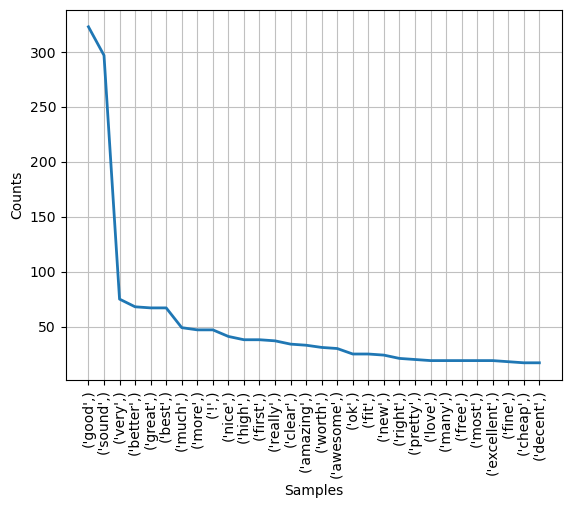

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
ngram_freq.plot(30)

##### The graph shows that for the first three words, the frequency is decreasing rapidly, and then after that, the frequency continues to decrease but at a slower and more steady rate. This could mean that the initial words are very commonly associated with positive sentiment, while the later words are still positive but less commonly used.

# Collection of all the negative Sentiment sentences

In [20]:
nsentence = []
for p in range(len(blob.sentences)):
    if blob.sentences[p].sentiment_assessments.assessments != []:
        pl = blob.sentences[p].sentiment_assessments.assessments[0][1]
        if pl < 0:
            nsentence.append(blob.sentences[p])
            
print(nsentence[0:25])

[Sentence("BASS king bt Vocals are average...bt w8 let me clear a thing,,a earphone with great bass can be tuned to crispy vocals (using a good equalizer) bt a earphone lacking hardware for grt bass cannot e.g., Sennheiser cx series...after using it for around half year I would say these are better

Best part is this packaging was as same as there 2000rs earphones."), Sentence("The bass as well is amazing."), Sentence("I have used JBL, Senheiser, Boat, Beats, Philips, Remax and a few more."), Sentence("This one beats every other in ear earphones available in the market in terms of Bass."), Sentence("It has issues with mic as well as the person on other side can't hear me properly."), Sentence("Worst Product Ever !!!"), Sentence("Even it didn't satisfy common expectations."), Sentence("The microphone is not good in receiving my audio."), Sentence("Bass is loud and clear."), Sentence("Durable I'm not supposed to tell this because using since few days only."), Sentence("I wonder that any 

In [21]:
# Number of negative sentiment sentences 
len(nsentence)

343

# Collecting all the negative Sentiment words

In [22]:
senti_neg = []
for i in range(len(blist)):
    plt = blist[i][1]
    if plt < 0:
        senti_neg.append(blist[i][0])
        

In [23]:
# Number of sentences containing negative sentiments 
len(senti_neg)

987

In [24]:
len(senti_pos)

1955

In [25]:
nsenti = []
for i in range(len(senti_neg)):
    nlist = senti_neg[i]
    for j in range(len(nlist)):
        nsenti.append(nlist[j])
        

In [26]:
len(set(nsenti))

171

In [27]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER

for ngram in nltk.ngrams(nsenti, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common(188)

[(('bass',), 291),
 (('not',), 64),
 (('other',), 54),
 (('very',), 34),
 (('little',), 32),
 (('bad',), 30),
 (('worst',), 27),
 (('few',), 25),
 (('flat',), 23),
 (('!',), 22),
 (('long',), 22),
 (('disappointed',), 20),
 (('heavy',), 19),
 (('good',), 18),
 (('poor',), 15),
 (('due',), 14),
 (('average',), 14),
 (('base',), 13),
 (('rough',), 11),
 (('really',), 11),
 (('small',), 11),
 (('down',), 10),
 (('waste',), 10),
 (('broken',), 9),
 (('much',), 9),
 (('expected',), 8),
 (('previously',), 7),
 (('previous',), 7),
 (('terrible',), 7),
 (('loose',), 7),
 (('hard',), 6),
 (('mean',), 6),
 (('horrible',), 6),
 (('less',), 6),
 (('half',), 5),
 (('fake',), 5),
 (('pathetic',), 5),
 (('clear',), 5),
 (('confused',), 5),
 (('missing',), 5),
 (('careful',), 5),
 (('uncomfortable',), 4),
 (('able',), 4),
 (('disappointing',), 4),
 (('blindly',), 4),
 (('failed',), 4),
 (('unfortunately',), 4),
 (('extreme',), 4),
 (('roughly',), 4),
 (('worse',), 4),
 (('center',), 4),
 (('past',), 4

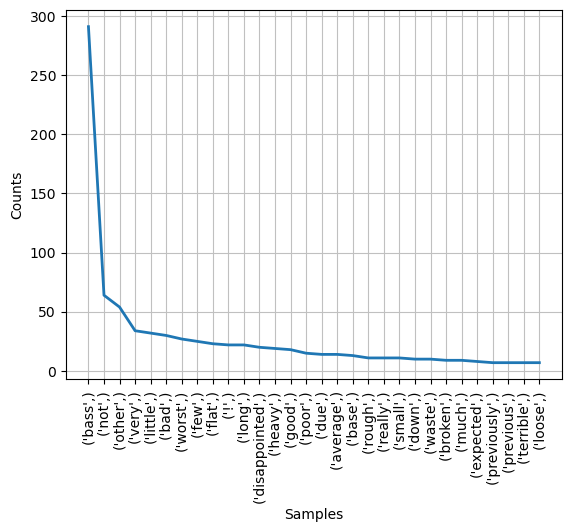

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
ngram_freq.plot(30)

##### The graph shows that for the first two words, the frequency is decreasing rapidly, and then for the next two words, the frequency continues to decrease but at a slower rate, and then it decreases steadily for the rest of the words. This could mean that the first two words are very commonly associated with negative sentiment in reviews, while the next two words are still negative but less commonly used, and the remaining words are also negative but even less commonly used. However, without more context, it's difficult to provide a more specific interpretation.

# Probability distribution of 'positive' and 'negative' sentiment words

# Positive Table

In [29]:
pw = Counter(psenti)
T = len(psenti) + len(nsenti)
  
dfp = pd.DataFrame.from_dict(pw, orient='index').reset_index()
dfp.columns = ["PosWords", "Frequency"]
dfp["Probability"] = dfp["Frequency"]/T
dfp.sort_values( by="Frequency", ascending=False, inplace = True)
pdf = dfp[dfp['Frequency'] > 50]
pdf

,PosWords,Frequency,Probability
5,good,323,0.097701
0,sound,297,0.089837
1,very,75,0.022686
6,better,68,0.020569
4,great,67,0.020266
7,best,67,0.020266


# Negative table

In [30]:
nw = Counter(nsenti)
T = len(psenti) + len(nsenti)
 
dfn = pd.DataFrame.from_dict(nw, orient='index').reset_index()
dfn.columns = ["NegWords", "Frequency"]
dfn["Probability"] = dfn["Frequency"]/T
dfn.sort_values( by="Frequency", ascending=False, inplace = True)
ndf = dfn[dfn['Frequency'] > 5]
ndf

,NegWords,Frequency,Probability
0,bass,291,0.088022
10,not,64,0.019359
3,other,54,0.016334
27,very,34,0.010284
2,little,32,0.009679
19,bad,30,0.009074
6,worst,27,0.008167
5,few,25,0.007562
40,flat,23,0.006957
7,!,22,0.006655


# Collect all the positive sentiment reviews and perform topic modelling and cluster modelling on that data. This will help you to identify the topics that are doing well about your product.

In [31]:
psentence[0:10]

[Sentence("As a result the out put sound of this earphone is very balanced, vocals , bass , high mids and lows are also equally balanced."),
 Sentence("It was superb."),
 Sentence("The sound quality is just too good."),
 Sentence("Never thought a 500rs headphones can be this good."),
 Sentence("You get this in a nice little box with a sheet of stickers you can put on your phone or other devices."),
 Sentence("Very good feature since I always hated headphones like this because of how frequently they fell out."),
 Sentence("The product I received was the best in ear phones."),
 Sentence("Though I was compromised with performance.. but the ANT AUDIO is the one which satisfied my desire for the search of BASS HEAD EAR PHONES."),
 Sentence("Absolute Noise Cancellation, High Definition Sound Quality with any music android music playe
 
 I am writing this review after one month of usage."),
 Sentence("No other ear phone matches the sound quality alongside huge thumping bass they are allowed t

# Topic Modelling

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

In [33]:
# Create a dictionary to store the sentences
sentences_dict = {'Sentence': []}

# Iterate over the list of sentences and append each sentence to the dictionary
for sentence in psentence:
    sentences_dict['Sentence'].append(str(sentence))

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(sentences_dict)

# Print the DataFrame
print(df)


                                              Sentence
0    As a result the out put sound of this earphone...
1                                       It was superb.
2                  The sound quality is just too good.
3    Never thought a 500rs headphones can be this g...
4    You get this in a nice little box with a sheet...
..                                                 ...
708  It was easily replaced by the company,thanks t...
709  Otherwise in terms of sound quality,it stands ...
710  It is a good product with nice sound quality a...
711    Good for listening Rock, Hiphop and pop genres.
712  I have purchased after seeing the reviews but ...

[713 rows x 1 columns]


In [34]:
# Import the required functions for preprocessing 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')


In [35]:
# Preprocessing function
def preprocess(text):
    text = text.lower()
    text=text.strip()  #get rid of leading/trailing whitespace 
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove all the symbols which are not belong to this set 
    text = re.sub(r'X.*X', '', text)  # # remove all the masked words that start with 'X' and end with 'X'. 
    text = re.sub(r'x.*x', '', text)  # remove all the masked words that start with 'x' and end with 'x'.
    temp_sent =[]
    words = nltk.word_tokenize(text)
    for word in words:         # keep all the words that do not belong to stop word list and contain only alphabetic character and whose lenght is more than 2    
        lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha() and len(lemmatized)>2:
            temp_sent.append(lemmatized)
    
    finalsent = ' '.join(temp_sent)
    return finalsent

df["Sentence_Cleaned"]= df["Sentence"].apply(preprocess) # Creating a new preprocessed column 

In [36]:
df

,Sentence,Sentence_Cleaned
0,As a result the out put sound of this earphone...,result put sound earphone balanced vocal bass ...
1,It was superb.,superb
2,The sound quality is just too good.,sound quality good
3,Never thought a 500rs headphones can be this g...,never thought headphone good
4,You get this in a nice little box with a sheet...,get nice little box sheet sticker put phone de...
...,...,...
708,"It was easily replaced by the company,thanks t...",easily replaced companythanks one year warrant...
709,"Otherwise in terms of sound quality,it stands ...",otherwise term sound qualityit stand price
710,It is a good product with nice sound quality a...,good product nice sound quality noise cancella...
711,"Good for listening Rock, Hiphop and pop genres.",good listening rock hiphop pop genre


In [37]:
# dividing the data set for model building and validation. hold data is the validation data
X_train, X_hold = train_test_split(df, test_size=0.4, random_state=111)

In [38]:
# Vectorizing and fitting the model. Note that while vectorizing, we are not taking those words that appear in less than 50 documents.
# We are not taking those words that appear in more than 75% of documents. We are only considering 6000 words in the vectorspace.
vectorizer_tf = TfidfVectorizer(max_df=0.75, min_df=50, max_features=6000)
tf_vectors = vectorizer_tf.fit_transform(X_train.Sentence_Cleaned) 

In [39]:
# just checking the vectors corresponding to each document 
tf_vectors

<427x7 sparse matrix of type '<class 'numpy.float64'>'
	with 633 stored elements in Compressed Sparse Row format>

In [40]:
# LatentDirichletAllocation function will find the pronciple direction for each document  
lda = decomposition.LatentDirichletAllocation(n_components=6, max_iter=5, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [41]:
# score of each document in the 6 principle directions 
W1

array([[0.08335036, 0.08344313, 0.08334528, 0.08355235, 0.58273775,
        0.08357114],
       [0.0833609 , 0.08339216, 0.08335701, 0.08333743, 0.0833393 ,
        0.58321318],
       [0.08334   , 0.08342774, 0.58250656, 0.08379979, 0.08352975,
        0.08339616],
       ...,
       [0.0833609 , 0.08339216, 0.08335701, 0.08333743, 0.0833393 ,
        0.58321318],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.06103994, 0.0612164 , 0.06185735, 0.69121475, 0.06330204,
        0.06136952]])

In [42]:
# Collecting 18 most frequent words for each of the 6 priciple directions. From these words, one have to understand what topic 
# name should be appropriate for each topic. 
num_words=15

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

C:\Users\kbsnd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
topics

['earphone one bass good sound quality product',
 'product quality good one sound bass earphone',
 'quality sound bass one earphone product good',
 'sound quality good earphone product one bass',
 'good bass quality sound earphone product one',
 'one good earphone quality sound product bass']

In [44]:
# Identifying dominant topic for each document 
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_train.Sentence_Cleaned))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [45]:
df_doc_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc0,0.08,0.08,0.08,0.08,0.58,0.08,4
Doc1,0.08,0.08,0.08,0.08,0.08,0.58,5
Doc2,0.08,0.08,0.58,0.08,0.08,0.08,2
Doc3,0.38,0.07,0.35,0.07,0.07,0.07,0
Doc4,0.08,0.08,0.08,0.58,0.08,0.08,3
...,...,...,...,...,...,...,...
Doc422,0.58,0.08,0.08,0.08,0.08,0.08,0
Doc423,0.07,0.07,0.07,0.65,0.07,0.07,3
Doc424,0.08,0.08,0.08,0.08,0.08,0.58,5
Doc425,0.17,0.17,0.17,0.17,0.17,0.17,0


In [46]:
# Just checking if documents are align with the topics 
X_train.head()

,Sentence,Sentence_Cleaned
481,Fitting in ear is not that good.,fitting ear good
147,But There is One issue with mic its Not Sustai...,one issue mic sustainable day later
456,Build quality is juss superb that's it.,build quality juss superb thats
278,The earphone is excellent quality.,earphone excellent quality
582,The sound increases by itself.,sound increase


In [47]:
# Check how good our model for unknown data 
WHold = lda.transform(vectorizer_tf.transform(X_hold.Sentence_Cleaned[:5]))

In [48]:
# Identifying dominant topic for holdout documents 
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_hold.Sentence_Cleaned[:5]))]
df_doc_topic = pd.DataFrame(np.round(WHold, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [49]:
df_doc_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc0,0.08,0.08,0.58,0.08,0.08,0.08,2
Doc1,0.08,0.08,0.08,0.08,0.58,0.08,4
Doc2,0.07,0.07,0.07,0.07,0.65,0.07,4
Doc3,0.06,0.05,0.05,0.51,0.05,0.27,3
Doc4,0.17,0.17,0.17,0.17,0.17,0.17,0


In [50]:
# Just check how good the model fit for unknown data 
X_hold.head()

,Sentence,Sentence_Cleaned
327,"Build quality - I liked it, easy to put in and...",build quality liked easy put wire seems tangle...
87,he packaging is extremely good.,packaging extremely good
320,Voice clarity is very good but treble is littl...,voice clarity good treble little bit muffled e...
594,I enjoyed good quality sound and calls for abo...,enjoyed good quality sound call month best pri...
281,Great choice for 500.,great choice


# The following topics are identified that are doing well about the product

1. 'earphone one bass good sound quality product',
2.  'product quality good one sound bass earphone',
3. 'quality sound bass one earphone product good',
4. 'sound quality good earphone product one bass',
5. 'good bass quality sound earphone product one',
6. 'one good earphone quality sound product bass'

# Text data Clustering

In [51]:
df

,Sentence,Sentence_Cleaned
0,As a result the out put sound of this earphone...,result put sound earphone balanced vocal bass ...
1,It was superb.,superb
2,The sound quality is just too good.,sound quality good
3,Never thought a 500rs headphones can be this g...,never thought headphone good
4,You get this in a nice little box with a sheet...,get nice little box sheet sticker put phone de...
...,...,...
708,"It was easily replaced by the company,thanks t...",easily replaced companythanks one year warrant...
709,"Otherwise in terms of sound quality,it stands ...",otherwise term sound qualityit stand price
710,It is a good product with nice sound quality a...,good product nice sound quality noise cancella...
711,"Good for listening Rock, Hiphop and pop genres.",good listening rock hiphop pop genre


In [52]:
df = df.drop('Sentence_Cleaned', axis=1)
df

,Sentence
0,As a result the out put sound of this earphone...
1,It was superb.
2,The sound quality is just too good.
3,Never thought a 500rs headphones can be this g...
4,You get this in a nice little box with a sheet...
...,...
708,"It was easily replaced by the company,thanks t..."
709,"Otherwise in terms of sound quality,it stands ..."
710,It is a good product with nice sound quality a...
711,"Good for listening Rock, Hiphop and pop genres."


In [53]:
import nltk
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['Sentence']))
len(norm_corpus)


713

# Use CountVectorizer to vectorize the text

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1, 2), min_df=20, max_df=0.8)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix.shape

(713, 59)

# Kmeans Clustering

In [55]:
from sklearn.cluster import KMeans

# Let us build the first model 
NUM_CLUSTERS = 6
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)
km1

KMeans(max_iter=100, n_clusters=6, n_init=15, random_state=42)

In [56]:
from collections import Counter

Counter(km1.labels_)


Counter({3: 372, 0: 125, 1: 141, 2: 62, 5: 12, 4: 1})

In [57]:
# Adding Cluster levels in the original dataframe 
df['kmeans_cluster'] = km1.labels_
df.head(10)

,Sentence,kmeans_cluster
0,As a result the out put sound of this earphone...,3
1,It was superb.,3
2,The sound quality is just too good.,0
3,Never thought a 500rs headphones can be this g...,1
4,You get this in a nice little box with a sheet...,3
5,Very good feature since I always hated headpho...,1
6,The product I received was the best in ear pho...,3
7,Though I was compromised with performance.. bu...,3
8,"Absolute Noise Cancellation, High Definition S...",0
9,No other ear phone matches the sound quality a...,0


In [58]:
feature_names = cv.get_feature_names()
topn_features = 15
ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]

C:\Users\kbsnd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [59]:
# get key features for each cluster
# get reviews belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    ratings = df[df['kmeans_cluster'] == cluster_num]['Sentence'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('Ratings:', ratings)
    print('-'*125)


CLUSTER #1
Key Features: ['quality', 'sound', 'sound quality', 'good', 'bass', 'earphones', 'product', 'earphone', 'one', 'price', 'great', 'quality good', 'build', 'range', 'cancellation']
Ratings: ['The sound quality is just too good.', 'Absolute Noise Cancellation, High Definition Sound Quality with any music android music playe\n\nI am writing this review after one month of usage.', 'No other ear phone matches the sound quality alongside huge thumping bass they are allowed to produce.If you want an earphone with high bass but not compromising on sound quality ,then this is the one for you.', 'This beats Boat 225 in terms of sound quality whereas both stands equal in Bass terms.', 'Sound quality is not bad but the pain is intense for me.', "It's worth one I have been using it for almost 1month and there is no issue\n\nI never.felt to use any equalizer because sound quality is super.", 'The sound quality is great even in highs.', 'good sound quality,\ngreat design,\nbetter material.'

In [60]:
css = [] 
for i in range(2, 8): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(cv_matrix)
    css.append(kmeans.inertia_)

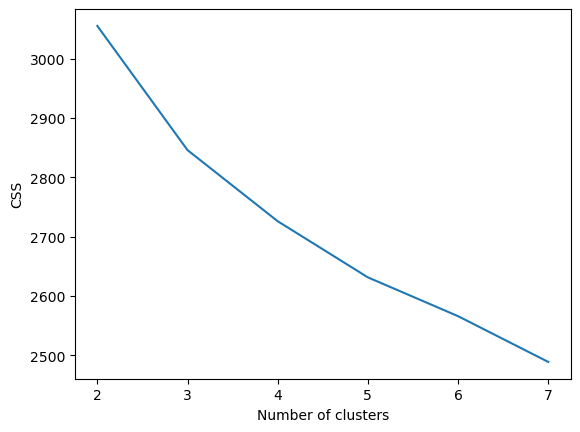

In [61]:
import matplotlib.pyplot as plt
plt.plot(range(2, 8), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

In [62]:
from sklearn.cluster import KMeans

# Let us build the first model 
NUM_CLUSTERS = 5
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)
km1

KMeans(max_iter=100, n_clusters=5, n_init=15, random_state=42)

In [63]:
from collections import Counter

Counter(km1.labels_)

Counter({3: 557, 1: 123, 0: 30, 4: 2, 2: 1})

In [64]:
# Adding Cluster levels in the original dataframe 
df['kmeans_cluster'] = km1.labels_
df.head(10)

,Sentence,kmeans_cluster
0,As a result the out put sound of this earphone...,3
1,It was superb.,3
2,The sound quality is just too good.,1
3,Never thought a 500rs headphones can be this g...,3
4,You get this in a nice little box with a sheet...,3
5,Very good feature since I always hated headpho...,3
6,The product I received was the best in ear pho...,3
7,Though I was compromised with performance.. bu...,3
8,"Absolute Noise Cancellation, High Definition S...",1
9,No other ear phone matches the sound quality a...,1


In [65]:
feature_names = cv.get_feature_names()
topn_features = 20
ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]

C:\Users\kbsnd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [66]:
# Initialize variables to keep track of the largest cluster
largest_cluster_num = None
largest_cluster_count = 0

# get key features for each cluster
# get reviews belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    ratings = df[df['kmeans_cluster'] == cluster_num]['Sentence'].values.tolist()
    
    # count the number of data points in the cluster
    count = len(df[df['kmeans_cluster'] == cluster_num])

    # assign names to the cluster based on the cluster number
    if cluster_num == 0:
        cluster_name = "PrecisionAudio Earbuds"
    elif cluster_num == 1:
        cluster_name = "PrimeSound Earphones"
    elif cluster_num == 2:
        cluster_name = "KeynoteSound Earphones"
    elif cluster_num == 3:
        cluster_name = "HarmonySound Earphones"     
    else:
        cluster_name = "ProvenQuality Earphones"
        
    # check if this cluster has the largest count so far
    if count > largest_cluster_count:
        largest_cluster_num = cluster_num
        largest_cluster_count = count

    # print cluster information
    print('CLUSTER #'+str(cluster_num+1))
    print('Cluster Name:', cluster_name)
    print('Number of data points:', count)
    print('Key Features:', key_features)
    print('Ratings:', ratings)
    print('-'*125)

   

CLUSTER #1
Cluster Name: PrecisionAudio Earbuds
Number of data points: 30
Key Features: ['good', 'bass', 'quality', 'sound', 'product', 'earphones', 'box', 'quality good', 'sound quality', 'good bass', 'also', 'one', 'audio', 'earphone', 'price', 'nice', 'metal', 'like', 'wire', 'stickers']
Ratings: ["The sound is really good nice and punchier bass durability is amazing for ruf use I play Pubg a lot on it and must say the surround sound you can easily spot ememy lisent music and stream YouTube videos it's very good in fact amazing on this earphones no pain no nothing I am giving this review after 9 months of usage and still going on good I am not promoting this product it's just feedback for to decide for others to buy this this earphones or not enjoy\xa0.", 'They have good sound quality, no noise cancelation, but the bass quality is good.', 'Also its sound quality is good and the bass is also there and you will feel the bass when there is need not like other earphones which produces b

In [67]:
# print the largest cluster's information
print('LARGEST CLUSTER')
print('Cluster #'+str(largest_cluster_num+1))
print('Number of data points:', largest_cluster_count)

LARGEST CLUSTER
Cluster #4
Number of data points: 557


# Findings and Insights

##### Based on the provided topic modelling results and clusters, we can observe several findings and insights:

The most frequently occurring words in the topic modelling results are 'good,' 'bass,' 'quality,' 'sound,' 'product,' 'earphone,' and 'one.' This suggests that these are the most important features that people consider when buying earphones.

The clusters suggest that people value the quality and sound of earphones over other features such as packaging or price. The top features in the clusters are 'quality,' 'sound,' 'good,' 'bass,' 'earphones,' 'product,' 'price,' and 'earphone.' This indicates that people prioritize audio quality and product performance over other factors.

The clusters also suggest that people prefer brands that offer good build quality and a range of audio products. For example, in Cluster #2, we see the presence of the brand 'boat,' which is known for its audio products. Similarly, in Cluster #5, we see the mention of 'Ant Audio,' which is a brand that produces earphones with good build quality.

Another insight we can draw from the clusters is that people are willing to pay a higher price for better quality earphones. This is evident from the presence of the words 'price,' 'quality good,' and 'best' in the clusters.

Additionally, we can see that people appreciate the inclusion of accessories such as stickers and metal boxes with their earphones. This is evident from the presence of the words 'metal,' 'stickers,' and 'box' in the clusters.

Finally, it is worth noting that the clusters suggest that people have varying opinions about the same earphone product. For example, Cluster #3 only contains one data point, which suggests that the individual who wrote the review had a significantly different opinion about the product compared to the others. This highlights the importance of considering multiple reviews and sources of information when making a purchasing decision.

# Collect all the negative sentiment reviews and perform topic modelling and cluster modelling on that data. This will help you to identify possible drawbacks of your product.

In [68]:
nsentence[0:10]

[Sentence("BASS king bt Vocals are average...bt w8 let me clear a thing,,a earphone with great bass can be tuned to crispy vocals (using a good equalizer) bt a earphone lacking hardware for grt bass cannot e.g., Sennheiser cx series...after using it for around half year I would say these are better
 
 Best part is this packaging was as same as there 2000rs earphones."),
 Sentence("The bass as well is amazing."),
 Sentence("I have used JBL, Senheiser, Boat, Beats, Philips, Remax and a few more."),
 Sentence("This one beats every other in ear earphones available in the market in terms of Bass."),
 Sentence("It has issues with mic as well as the person on other side can't hear me properly."),
 Sentence("Worst Product Ever !!!"),
 Sentence("Even it didn't satisfy common expectations."),
 Sentence("The microphone is not good in receiving my audio."),
 Sentence("Bass is loud and clear."),
 Sentence("Durable I'm not supposed to tell this because using since few days only.")]

# Topic Modelling

In [69]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

In [70]:
# Create a dictionary to store the sentences
sentences_dict = {'Sentence': []}

# Iterate over the list of sentences and append each sentence to the dictionary
for sentence in nsentence:
    sentences_dict['Sentence'].append(str(sentence))

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(sentences_dict)

# Print the DataFrame
print(df)


                                              Sentence
0    BASS king bt Vocals are average...bt w8 let me...
1                         The bass as well is amazing.
2    I have used JBL, Senheiser, Boat, Beats, Phili...
3    This one beats every other in ear earphones av...
4    It has issues with mic as well as the person o...
..                                                 ...
338  Previously I used BOAT I THINK THOSE ARE BETTE...
339                                   It's pathetic!!!
340             The bass in this one is too damn good.
341  It's like if I wiggle the wire, it will work b...
342  Bass is awesome, noise cancellation is good co...

[343 rows x 1 columns]


In [71]:
# Import the required functions for preprocessing 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [72]:
# Preprocessing function
def preprocess(text):
    text = text.lower()
    text=text.strip()  #get rid of leading/trailing whitespace 
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove all the symbols which are not belong to this set 
    text = re.sub(r'X.*X', '', text)  # # remove all the masked words that start with 'X' and end with 'X'. 
    text = re.sub(r'x.*x', '', text)  # remove all the masked words that start with 'x' and end with 'x'.
    temp_sent =[]
    words = nltk.word_tokenize(text)
    for word in words:         # keep all the words that do not belong to stop word list and contain only alphabetic character and whose lenght is more than 2    
        lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha() and len(lemmatized)>2:
            temp_sent.append(lemmatized)
    
    finalsent = ' '.join(temp_sent)
    return finalsent

df["Sentence_Cleaned"]= df["Sentence"].apply(preprocess) # Creating a new preprocessed column 

In [73]:
df

,Sentence,Sentence_Cleaned
0,BASS king bt Vocals are average...bt w8 let me...,bass king vocal averagebt let clear thinga ear...
1,The bass as well is amazing.,bass well amazing
2,"I have used JBL, Senheiser, Boat, Beats, Phili...",used jbl senheiser boat beat philip remax
3,This one beats every other in ear earphones av...,one beat every ear earphone available market t...
4,It has issues with mic as well as the person o...,issue mic well person side cant hear properly
...,...,...
338,Previously I used BOAT I THINK THOSE ARE BETTE...,previously used boat think better
339,It's pathetic!!!,pathetic
340,The bass in this one is too damn good.,bass one damn good
341,"It's like if I wiggle the wire, it will work b...",like wiggle wire work long


In [74]:
# dividing the data set for model building and validation. hold data is the validation data
X_train, X_hold = train_test_split(df, test_size=0.4, random_state=111)

In [102]:
# Vectorizing and fitting the model. Note that while vectorizing, we are not taking those words that appear in less than 50 documents.
# We are not taking those words that appear in more than 75% of documents. We are only considering 6000 words in the vectorspace.
vectorizer_tf = TfidfVectorizer(max_df=100, min_df=0.05, max_features=6000)
tf_vectors = vectorizer_tf.fit_transform(X_train.Sentence_Cleaned) 

In [103]:
tf_vectors

<205x22 sparse matrix of type '<class 'numpy.float64'>'
	with 469 stored elements in Compressed Sparse Row format>

In [104]:
# LatentDirichletAllocation function will find the pronciple direction for each document  
lda = decomposition.LatentDirichletAllocation(n_components=6, max_iter=10, learning_method='online', learning_offset=50, n_jobs=-1, random_state=None)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [105]:
W1

array([[0.04935854, 0.75188537, 0.05146077, 0.04907658, 0.04905328,
        0.04916545],
       [0.64444917, 0.07090438, 0.07077462, 0.07084367, 0.07118488,
        0.07184327],
       [0.04856466, 0.76977324, 0.045724  , 0.04530692, 0.04525509,
        0.04537609],
       ...,
       [0.54450425, 0.05655481, 0.05686004, 0.22915566, 0.05645149,
        0.05647375],
       [0.08337394, 0.08337926, 0.58262853, 0.08343722, 0.0836618 ,
        0.08351925],
       [0.06228386, 0.69162581, 0.06150038, 0.06151305, 0.06150343,
        0.06157347]])

In [106]:
# Collecting 18 most frequent words for each of the 6 priciple directions. From these words, one have to understand what topic 
# name should be appropriate for each topic. 
num_words=15

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

C:\Users\kbsnd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [107]:
topics

['bass earphone much quality music sound working even one dont good ear side like use',
 'one good bass noise use cancellation sound side dont quality ear working month like product',
 'product used get quality earphone dont price even sound good like much side ear month',
 'like earphone side sound one quality product ear good get bass month used dont use',
 'ear price music get working month side one product use sound noise earphone bass cancellation',
 'month music one sound quality get side working product noise like use earphone much even']

In [108]:
# Identifying dominant topic for each document 
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_train.Sentence_Cleaned))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [109]:
df_doc_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc0,0.05,0.75,0.05,0.05,0.05,0.05,1
Doc1,0.64,0.07,0.07,0.07,0.07,0.07,0
Doc2,0.05,0.77,0.05,0.05,0.05,0.05,1
Doc3,0.06,0.06,0.06,0.69,0.06,0.06,3
Doc4,0.06,0.06,0.06,0.06,0.69,0.06,4
...,...,...,...,...,...,...,...
Doc200,0.07,0.07,0.65,0.07,0.07,0.07,2
Doc201,0.58,0.08,0.08,0.08,0.08,0.08,0
Doc202,0.54,0.06,0.06,0.23,0.06,0.06,0
Doc203,0.08,0.08,0.58,0.08,0.08,0.08,2


In [110]:
# Just checking if documents are align with the topics 
X_train.head()

,Sentence,Sentence_Cleaned
143,Bass - 9/10\nNoise cancellation - 8/10\nSound ...,bass noise cancellation sound quality overall ...
88,"Apart from bass, the music listening experienc...",apart bass music listening experience pathetic
81,Bass quality is really good\nVocals are also a...,bass quality really good vocal also adequately...
283,When u are on call other side person can't lis...,call side person cant listen properlyit sound ...
155,I have been trying headphones for casual use w...,trying headphone casual use doesnt need music ...


In [111]:
# Check how good our model for unknown data 
WHold = lda.transform(vectorizer_tf.transform(X_hold.Sentence_Cleaned[:5]))

In [112]:
# Identifying dominant topic for holdout documents 
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_hold.Sentence_Cleaned[:5]))]
df_doc_topic = pd.DataFrame(np.round(WHold, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [113]:
df_doc_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc0,0.07,0.65,0.07,0.07,0.07,0.07,1
Doc1,0.17,0.17,0.17,0.17,0.17,0.17,0
Doc2,0.65,0.07,0.07,0.07,0.07,0.07,0
Doc3,0.08,0.08,0.08,0.58,0.08,0.08,3
Doc4,0.06,0.06,0.69,0.06,0.06,0.06,2


In [114]:
# Just check how good the model fit for unknown data 
X_hold.head()

,Sentence,Sentence_Cleaned
288,Bass is thumping and can create a good listini...,bass thumping create good listining experience
26,Compatability with mobile is worst.,compatability mobile worst
49,Or if you are looking for earth shattering bas...,looking earth shattering bass decent quality r...
341,"It's like if I wiggle the wire, it will work b...",like wiggle wire work long
18,Pathetic quality\n\nThe product is too good.,pathetic quality product good


##### Following are the most dominant topics for negative sentiments
1. 'bass earphone much quality music sound working even one dont good ear side like use',
2. 'one good bass noise use cancellation sound side dont quality ear working month like product',
3. 'product used get quality earphone dont price even sound good like much side ear month',
4. 'like earphone side sound one quality product ear good get bass month used dont use',
5. 'ear price music get working month side one product use sound noise earphone bass cancellation',
6. 'month music one sound quality get side working product noise like use earphone much even'

# Text data Clustering

In [115]:
df

,Sentence,kmeans_cluster
0,BASS king bt Vocals are average...bt w8 let me...,5
1,The bass as well is amazing.,5
2,"I have used JBL, Senheiser, Boat, Beats, Phili...",0
3,This one beats every other in ear earphones av...,5
4,It has issues with mic as well as the person o...,0
...,...,...
338,Previously I used BOAT I THINK THOSE ARE BETTE...,0
339,It's pathetic!!!,0
340,The bass in this one is too damn good.,5
341,"It's like if I wiggle the wire, it will work b...",0


In [121]:
df = df.drop('Sentence_Cleaned', axis=1)
df.head()

,Sentence,kmeans_cluster
0,BASS king bt Vocals are average...bt w8 let me...,5
1,The bass as well is amazing.,5
2,"I have used JBL, Senheiser, Boat, Beats, Phili...",0
3,This one beats every other in ear earphones av...,5
4,It has issues with mic as well as the person o...,0


In [117]:
import nltk
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['Sentence']))
len(norm_corpus)


343

# Use CountVectorizer to vectorize the text

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1, 2), min_df=20, max_df=0.8)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix.shape

(343, 14)

# Clustering using K-Means

In [92]:
from sklearn.cluster import KMeans

# Let us build the first model 
NUM_CLUSTERS = 6
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)
km1

KMeans(max_iter=100, n_clusters=6, n_init=15, random_state=42)

In [93]:
from sklearn.cluster import KMeans

# Let us build the first model 
NUM_CLUSTERS = 6
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)
km1

KMeans(max_iter=100, n_clusters=6, n_init=15, random_state=42)

In [94]:
from collections import Counter

Counter(km1.labels_)

Counter({5: 85, 0: 166, 3: 32, 4: 45, 1: 6, 2: 9})

In [95]:
# Adding Cluster levels in the original dataframe 
df['kmeans_cluster'] = km1.labels_
df.head(10)

,Sentence,kmeans_cluster
0,BASS king bt Vocals are average...bt w8 let me...,5
1,The bass as well is amazing.,5
2,"I have used JBL, Senheiser, Boat, Beats, Phili...",0
3,This one beats every other in ear earphones av...,5
4,It has issues with mic as well as the person o...,0
5,Worst Product Ever !!!,3
6,Even it didn't satisfy common expectations.,0
7,The microphone is not good in receiving my audio.,0
8,Bass is loud and clear.,5
9,Durable I'm not supposed to tell this because ...,0


In [96]:
feature_names = cv.get_feature_names()
topn_features = 15
ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]

C:\Users\kbsnd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [118]:
# Initialize variables to keep track of the largest cluster
largest_cluster_num = None
largest_cluster_count = 0

# get key features for each cluster
# get reviews belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    ratings = df[df['kmeans_cluster'] == cluster_num]['Sentence'].values.tolist()
    
    # count the number of data points in the cluster
    count = len(df[df['kmeans_cluster'] == cluster_num])

    # assign names to the cluster based on the cluster number
    if cluster_num == 0:
        cluster_name = "SoundMate Earphones"
    elif cluster_num == 1:
        cluster_name = "BassBoost Sound Gear"
    elif cluster_num == 2:
        cluster_name = "OneEar Quality Audio"
    elif cluster_num == 3:
        cluster_name = "WorstProof AudioTech"
    elif cluster_num == 4:
        cluster_name = "HighQuality BassBuds"
    else:
        cluster_name = "GoodVibes Earphones"
        
    # check if this cluster has the largest count so far
    if count > largest_cluster_count:
        largest_cluster_num = cluster_num
        largest_cluster_count = count

    # print cluster information
    print('CLUSTER #'+str(cluster_num+1))
    print('Cluster Name:', cluster_name)
    print('Number of data points:', count)
    print('Key Features:', key_features)
    print('Ratings:', ratings)
    print('-'*125)

   

CLUSTER #1
Cluster Name: SoundMate Earphones
Number of data points: 166
Key Features: ['earphones', 'one', 'earphone', 'ear', 'side', 'sound', 'like', 'even', 'worst', 'dont', 'good', 'quality', 'product', 'bass']
Ratings: ['I have used JBL, Senheiser, Boat, Beats, Philips, Remax and a few more.', "It has issues with mic as well as the person on other side can't hear me properly.", "Even it didn't satisfy common expectations.", 'The microphone is not good in receiving my audio.', "Durable I'm not supposed to tell this because using since few days only.", 'I wonder that any other brand offer noise cancellation in this range.', 'Also getting little ear pain.', 'Previously I used Boat 220 for almost 2years, with which I was fully satisfied.', 'If there is a lightening deal and drops by Rs 150.00 then you should buy not one but ,the other for backup.', 'Fake alert.', 'Earbuds feel a bit heavy for the ears if you are hearing music or watching movies for longer time\nThe Audio Controls work 

In [119]:
css = [] 
for i in range(2, 8): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(cv_matrix)
    css.append(kmeans.inertia_)

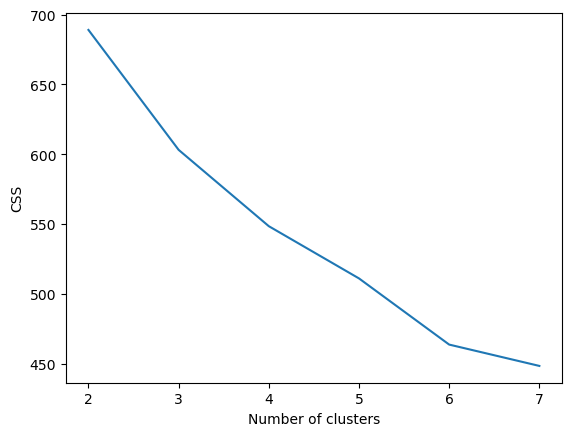

In [120]:
import matplotlib.pyplot as plt
plt.plot(range(2, 8), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

In [100]:
# print the largest cluster's information
print('LARGEST CLUSTER')
print('Cluster #'+str(largest_cluster_num+1))
print('Number of data points:', largest_cluster_count)

LARGEST CLUSTER
Cluster #1
Number of data points: 166


# Findings and Insights

##### The largest cluster is the SoundMate Earphones cluster, which consists of 166 data points. This cluster has key features such as earphones, sound, quality, and bass, indicating that customers value the quality of sound produced by the earphones.

The second-largest cluster is the GoodVibes Earphones cluster, which consists of 85 data points. This cluster has key features such as good, sound, earphones, and bass, indicating that customers are looking for earphones that produce good quality sound with good bass.

The other clusters have a smaller number of data points, but they also provide insights into what customers are looking for when it comes to earphones. For example, the BassBoost Sound Gear cluster indicates that customers are interested in earphones that have a strong bass. The OneEar Quality Audio cluster suggests that customers are looking for earphones that have good quality audio in one ear.

Overall, the key features that customers value the most when it comes to earphones are sound quality, bass, and product quality. The clustering results provide valuable insights into customer preferences and can help companies in designing their products and marketing strategies.